#Download material 

Download of all files of orginal project from github

In [1]:
!git clone https://github.com/mchong6/JoJoGAN.git
%cd JoJoGAN
!pip install tqdm gdown scikit-learn==0.22 scipy lpips dlib opencv-python wandb
!wget https://github.com/ninja-build/ninja/releases/download/v1.8.2/ninja-linux.zip
!sudo unzip ninja-linux.zip -d /usr/local/bin/
!sudo update-alternatives --install /usr/bin/ninja ninja /usr/local/bin/ninja 1 --force
%load_ext autoreload
%autoreload 2
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2
!mv shape_predictor_68_face_landmarks.dat models/dlibshape_predictor_68_face_landmarks.dat

Cloning into 'JoJoGAN'...
remote: Enumerating objects: 490, done.
remote: Total 490 (delta 0), reused 0 (delta 0), pack-reused 490
Receiving objects: 100% (490/490), 63.51 MiB | 20.21 MiB/s, done.
Resolving deltas: 100% (203/203), done.
/content/JoJoGAN
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.0 MB 11.7 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 1.8 MB 35.8 MB/s 
     |████████████████████████████████| 145 kB 56.4 MB/s 
     |████████████████████████████████| 181 kB 12.4 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=fc5fb9c28150d212ff0f3a59834d68fd1e9e7f0cbcd87d8168a82bda31269bca
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools
  Attempting

**Downloader:** Class to let download files from google drive

In [2]:
# from StyelGAN-NADA
class Downloader(object):
    def __init__(self, use_pydrive):
        self.use_pydrive = use_pydrive

        if self.use_pydrive:
            self.authenticate()
        
    #Authenticate in case need to connect at personal google drive folder
    def authenticate(self):
        auth.authenticate_user()
        gauth = GoogleAuth()
        gauth.credentials = GoogleCredentials.get_application_default()
        self.drive = GoogleDrive(gauth)
    
    #Download pre-trained models
    def download_file(self, file_name):
        file_dst = os.path.join('models', file_name)
        file_id = drive_ids[file_name]
        if not os.path.exists(file_dst):
            print(f'Downloading {file_name}')
            if self.use_pydrive:
                downloaded = self.drive.CreateFile({'id':file_id})
                downloaded.FetchMetadata(fetch_all=True)
                downloaded.GetContentFile(file_dst)
            else:
                !gdown $file_id -O $file_dst

    #Download of new images used as test
    def download_images_test(self, file_name):
        file_dst = os.path.join('test_input', file_name)
        file_id = imgs_ids[file_name]
        if not os.path.exists(file_dst):
            print(f'Downloading {file_name}')
            if self.use_pydrive:
                downloaded = self.drive.CreateFile({'id':file_id})
                downloaded.FetchMetadata(fetch_all=True)
                downloaded.GetContentFile(file_dst)
            else:
                !gdown $file_id -O $file_dst

    #Download of images used as reference style
    def download_images_style(self, file_name):
        file_dst = os.path.join('style_images', file_name)
        file_id = imgs_ids[file_name]
        if not os.path.exists(file_dst):
            print(f'Downloading {file_name}')
            if self.use_pydrive:
                downloaded = self.drive.CreateFile({'id':file_id})
                downloaded.FetchMetadata(fetch_all=True)
                downloaded.GetContentFile(file_dst)
            else:
                !gdown $file_id -O $file_dst

Dictionaries with {name of file : id to let download}, this to allow download

In [16]:
drive_ids = {
    "stylegan2-ffhq-config-f.pt": "1Yr7KuD959btpmcKGAUsbAk5rPjX2MytK",
    "e4e_ffhq_encode.pt": "1o6ijA3PkcewZvwJJ73dJ0fxhndn0nnh7",
    "restyle_psp_ffhq_encode.pt": "1nbxCIVw9H3YnQsoIPykNEFwWJnHVHlVd",
    "arcane_caitlyn.pt": "1gOsDTiTPcENiFOrhmkkxJcTURykW1dRc",
    "arcane_caitlyn_preserve_color.pt": "1cUTyjU-q98P75a8THCaO545RTwpVV-aH",
    "arcane_jinx_preserve_color.pt": "1jElwHxaYPod5Itdy18izJk49K1nl4ney",
    "arcane_jinx.pt": "1quQ8vPjYpUiXM4k1_KIwP4EccOefPpG_",
    "arcane_multi_preserve_color.pt": "1enJgrC08NpWpx2XGBmLt1laimjpGCyfl",
    "arcane_multi.pt": "15V9s09sgaw-zhKp116VHigf5FowAy43f",
    "sketch_multi.pt": "1GdaeHGBGjBAFsWipTL0y-ssUiAqk8AxD",
    "disney.pt": "1zbE2upakFUAx8ximYnLofFwfT8MilqJA",
    "disney_preserve_color.pt": "1Bnh02DjfvN_Wm8c4JdOiNV4q9J7Z_tsi",
    "jojo.pt": "13cR2xjIBj8Ga5jMO7gtxzIJj2PDsBYK4",
    "jojo_preserve_color.pt": "1ZRwYLRytCEKi__eT2Zxv1IlV6BGVQ_K2",
    "jojo_yasuho.pt": "1grZT3Gz1DLzFoJchAmoj3LoM9ew9ROX_",
    "jojo_yasuho_preserve_color.pt": "1SKBu1h0iRNyeKBnya_3BBmLr4pkPeg_L",
    "art.pt": "1a0QDEHwXQ6hE_FcYEyNMuv5r5UnRQLKT",
    "supergirl.pt": "1L0y9IYgzLNzB-33xTpXpecsKU-t9DpVC",
    "supergirl_preserve_color.pt": "1VmKGuvThWHym7YuayXxjv0fSn32lfDpE",
}

imgs_ids = {
    "robert.jpg": "1LWG71-s7F1rw-_pHGEZQ9c570nLei6gY",
    "me.jpg": "1vlFr8ZNFh1FYrBNCXQtKxER8oyZ5JqXW",
    "goku.jpg": "1aNWZBaR0xFlJx54bFDmhG6mjN7xfwl_B",
    "avatar.jpg":"1yimfi6H0_6gm5INbgDv1BxvnUju-00aB",   
}

#Import Libraries

In [4]:
%cd JoJoGAN

import torch
torch.backends.cudnn.benchmark = True
from torchvision import transforms, utils
from util import *
from PIL import Image
import math
import random
import os
import numpy as np
from torch import nn, autograd, optim
from torch.nn import functional as F
from model import *
from e4e_projection import projection as e4e_projection
from google.colab import files
from copy import deepcopy
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from random import randint

os.makedirs('inversion_codes', exist_ok=True)
os.makedirs('style_images', exist_ok=True)
os.makedirs('style_images_aligned', exist_ok=True)
os.makedirs('models', exist_ok=True)

%matplotlib inline

[Errno 2] No such file or directory: 'JoJoGAN'
/content/JoJoGAN


Global variables

In [5]:
#Used to normalize images as tensors
transform = transforms.Compose(
    [
        transforms.Resize((1024, 1024)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

#device where load weights
device = 'cpu'

Downloads of some files not included in the orginal git repo

In [6]:
download_with_pydrive = False
downloader = Downloader(download_with_pydrive)
downloader.download_file('stylegan2-ffhq-config-f.pt')
downloader.download_file('e4e_ffhq_encode.pt')

Downloading...
From: https://drive.google.com/uc?id=1Yr7KuD959btpmcKGAUsbAk5rPjX2MytK
To: /content/JoJoGAN/models/stylegan2-ffhq-config-f.pt
100% 381M/381M [00:04<00:00, 78.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1o6ijA3PkcewZvwJJ73dJ0fxhndn0nnh7
To: /content/JoJoGAN/models/e4e_ffhq_encode.pt
100% 1.20G/1.20G [00:15<00:00, 76.5MB/s]


#Functions used

1. **load_generator:** load a pre-trained generator
2. **load_discriminator:** load a pre-trained discriminator
3. **elaborate image:** load the image and compute the weights of the GAN Inversion
4. **compute_output_on_given_image:** compute the output for a given input image
5. **compute_output_on_random_images:** compute the output on a set of random generated images

In [7]:
'''
  *input: no input
  *output: 1: model generator
           2: mean_latent of model generator
'''
def load_generator():

    generator = Generator(1024, 512, 8, 2).to(device)
    ckpt = torch.load('models/stylegan2-ffhq-config-f.pt', map_location=lambda storage, loc: storage)
    generator.load_state_dict(ckpt["g_ema"], strict=False) 
    mean_latent = generator.mean_latent(10000)

    return generator, mean_latent

'''
  *input: no input
  *output: model discriminator
'''
def load_discriminator():

    discriminator = Discriminator(1024,2).eval().to(device)
    ckpt = torch.load('models/stylegan2-ffhq-config-f.pt', map_location=lambda storage, loc: storage)
    discriminator.load_state_dict(ckpt["d"], strict=False)

    return discriminator

'''
  *input: name of the input image to transform
  *output: 1: image aligned
           2: parameters generated from GAN Inversion for the given image
'''
def elaborate_image(filename):

    filepath = f'test_input/{filename}'
    if not os.path.exists(filepath):
          downloader.download_images_test(filename)
          assert os.path.exists(filepath), f"{filepath} does not exist!"
    name = strip_path_extension(filepath)+'.pt'
    aligned_face = align_face(filepath)

    #GAN Inversion, to generate weights from a real image
    w = e4e_projection(aligned_face, name, device).unsqueeze(0)

    return aligned_face, w

'''
  *input: 1. referce image where output is based
          2. name of the input image to transform
  *output: Print reference image, input image and output image
'''
def compute_output_on_given_image(reference, filename, generator=None):

    im, im_w = elaborate_image(filename)

    #if a generator is not given, it means that it is pre-trained and load it
    if generator == None:
      generator, _ = load_generator()
      ckpt = f'{reference}.pt'
      downloader.download_file(ckpt)
      ckpt = torch.load(os.path.join('models', ckpt), map_location=lambda storage, loc: storage)
      generator.load_state_dict(ckpt["g"], strict=False)

    with torch.no_grad():
        generator.eval()

        #generate output image
        out = generator(im_w, input_is_latent=True)

        #elaborate reference style image
        style_path = f'style_images_aligned/{reference}.png'
        style_image = transform(Image.open(style_path)).unsqueeze(0).to(device)

        #elaborate input image
        face = transform(im).unsqueeze(0).to(device)

        #define and plot final output
        final_output = torch.cat([style_image, face, out], 0)
        display_image(utils.make_grid(final_output, normalize=True, range=(-1, 1)), title='Reference - Input - Output')

'''
  *input: 1. referce image where output is based
          2. number of images to want generate
          3. Integer to randomize the generation of new images
  *output: Print reference image, input image and output image
'''
def compute_output_on_random_images(reference, num_imgs, seed, generator=None):

    original_generator, mean_latent = load_generator()

    #if a generator is not given, it means that it is pre-trained and load it
    if(generator == None):
      ckpt = f'{reference}.pt'
      downloader.download_file(ckpt)
      ckpt = torch.load(os.path.join('models', ckpt), map_location=lambda storage, loc: storage)
      generator = deepcopy(original_generator)
      generator.load_state_dict(ckpt["g"], strict=False)

    #Parameter to generate different new images
    torch.manual_seed(seed)

    with torch.no_grad():
        generator.eval()

        #Generate new images
        z = torch.randn(num_imgs, 512, device=device)
        samples = original_generator([z], truncation=0.7, truncation_latent=mean_latent)

        #generate output of new images
        out = generator([z], truncation=0.7, truncation_latent=mean_latent)

        #elaborate reference style image and plot it
        style_path = f'style_images_aligned/{reference}.png'
        style_image = transform(Image.open(style_path)).unsqueeze(0).to(device)
        display_image(style_image, title='Reference')

        #Plot new input images and their relative output images
        final_output = torch.cat([samples, out], 0)
        display_image(utils.make_grid(final_output, normalize=True, range=(-1, 1), nrow=num_imgs), title='Input & Output')

6. **load_new_reference:** download and load a new image as reference style

**OSS.:** It can take as input a list of names since the model is capable to train both with a single reference image and with a set of images.

In [8]:
'''
  *input: list of names of new reference styles to load
  *output: 1. list of new reference images
           2. list of weigths of each reference image 
           3. Plot the image
'''
def load_new_reference(names):

    targets = []
    latents = []

    for name in names:

        style_path = os.path.join('style_images', name)
        if not os.path.exists(style_path):
            downloader.download_images_style(name)
            assert os.path.exists(style_path), f"{style_path} does not exist!"

        name = strip_path_extension(name)

        # crop and align the face
        style_aligned_path = os.path.join('style_images_aligned', f'{name}.png')
        if not os.path.exists(style_aligned_path):
            style_aligned = align_face(style_path)
            style_aligned.save(style_aligned_path)
        else:
            style_aligned = Image.open(style_aligned_path).convert('RGB')

        # GAN invert
        style_code_path = os.path.join('inversion_codes', f'{name}.pt')
        if not os.path.exists(style_code_path):
            latent = e4e_projection(style_aligned, style_code_path, device)
        else:
            latent = torch.load(style_code_path)['latent']

        targets.append(transform(style_aligned).to(device))
        latents.append(latent.to(device))

    targets = torch.stack(targets, 0)
    latents = torch.stack(latents, 0)

    target_im = utils.make_grid(targets, normalize=True, range=(-1, 1))
    display_image(target_im, title='Style References')  

    return targets, latents

7. **train_on_new_reference:** train a model on a new reference style

**OSS.:** to run this fuction, need to modify the original file /content/JoJoGAN/model.py at line 603, eliminating the second parameter of the function, i.e. "bias=bias".

In [9]:
'''
  *input: 1. number of epochs to train the net
          2. list of new reference images
          3. list of weigths of each reference image 
          4. path of a pre-trained model, to let restart training from last checkpoint, default is None (start a new training)
          5. Parameter in range (0.0,1.0) needed to control style intensity, default is alpha = 1.0
  *output: 1. the trained model
           2. list of losses of the model during the training
           3. Save the model into a file
'''
def train_on_new_reference(epochs, targets, latents, pathGenerator=None, alpha=1):

    losses = []
    old_epochs = 0

    # load discriminator for perceptual loss
    discriminator = load_discriminator()

    #load generator
    generator, _ = load_generator()

    #optimizer
    g_optim = optim.Adam(generator.parameters(), lr=2e-3, betas=(0, 0.99))

    #if path of a pre-trained model is gived, restart the train from last checkpoint
    if pathGenerator != None:
        ckpt = torch.load(pathGenerator)
        generator.load_state_dict(ckpt["model_state_dict"])
        g_optim.load_state_dict(ckpt['optimizer_state_dict'])
        losses = ckpt['losses']
        old_epochs = ckpt['epochs']

    # Which layers to swap for generating a family of plausible real images -> fake image
    id_swap = list(range(7, generator.n_latent))

    for epoch in range(epochs):

        print("Epoch: "+str(epoch+1)+"/"+str(epochs))

        mean_w = generator.get_latent(torch.randn([latents.size(0), 512]).to(device)).unsqueeze(1).repeat(1, generator.n_latent, 1)
        in_latent = latents.clone()
        in_latent[:, id_swap] = (1-alpha)*latents[:, id_swap] + alpha*mean_w[:, id_swap]
        img = generator(in_latent, input_is_latent=True)

        with torch.no_grad():
            real_feat = discriminator(targets)
        fake_feat = discriminator(img)

        loss = sum([F.l1_loss(a, b) for a, b in zip(fake_feat, real_feat)])/len(fake_feat)
        l = loss.item()
        losses.append(l)
        print("Loss: "+str(l)+"\n")

        g_optim.zero_grad()
        loss.backward()
        g_optim.step()

    PATH = "/content/new_reference.pt"
    torch.save({
            'epochs': epochs+old_epochs,
            'model_state_dict': generator.state_dict(),
            'optimizer_state_dict': g_optim.state_dict(),
            'losses': losses,
            }, PATH)

    return generator, losses

**8. plot_train_trand:** plot the losses of training

In [10]:
'''
  *input: list of the losses 
  *output: plot a graphic
'''
def plot_train_trend(train_loss: list):

  plt.plot(range(len(train_loss)),train_loss)
  plt.title("Train Loss")
  plt.xlabel('Epochs')
  plt.ylabel("Train Loss")
  plt.show

#Compute Output

##Pre-trained styles

Style: art
Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt


/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:64: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  "The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. "


Style: arcane_jinx
Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt
Style: arcane_caitlyn
Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt
Style: jojo_yasuho
Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt
Style: jojo
Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt
Style: disney
Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt


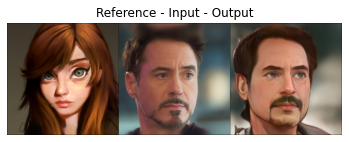

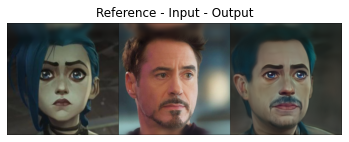

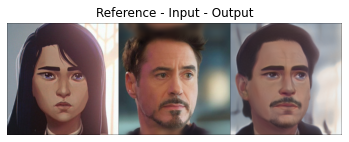

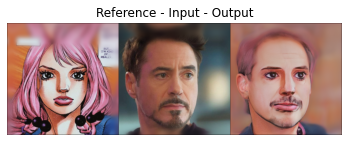

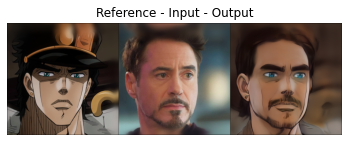

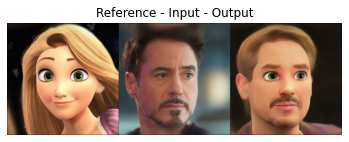

In [15]:
styles = ['art', 'arcane_jinx', 'arcane_caitlyn', 'jojo_yasuho', 'jojo', 'disney']
for style in styles:
  print("Style: "+style)
  compute_output_on_given_image(style, 'robert.jpg')

Style: art
Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt


/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:64: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  "The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. "


Style: arcane_jinx
Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt
Style: arcane_caitlyn
Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt
Style: jojo_yasuho
Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt
Style: jojo
Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt
Style: disney
Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt


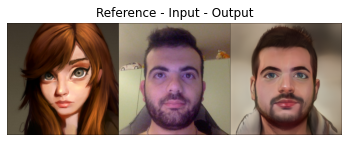

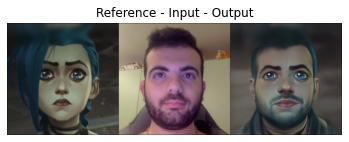

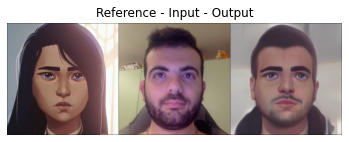

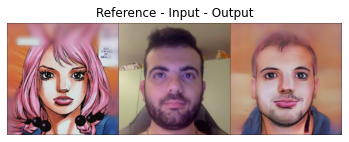

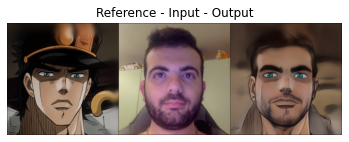

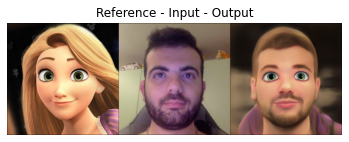

In [32]:
styles = ['art', 'arcane_jinx', 'arcane_caitlyn', 'jojo_yasuho', 'jojo', 'disney']
for style in styles:
  print("Style: "+style)
  compute_output_on_given_image(style, 'me.jpg')

Style: art


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:64: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  "The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. "


Style: arcane_jinx


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Style: arcane_caitlyn


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Style: jojo_yasuho


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Style: jojo


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Style: disney


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


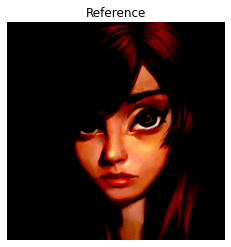

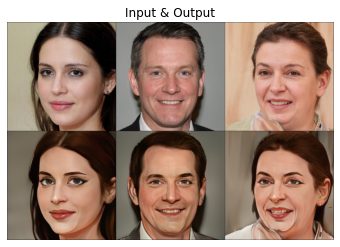

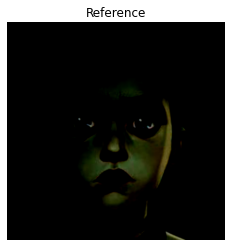

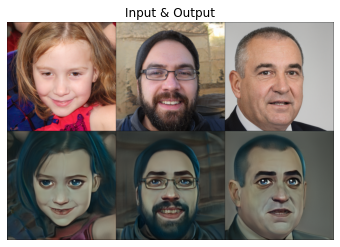

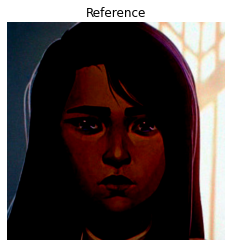

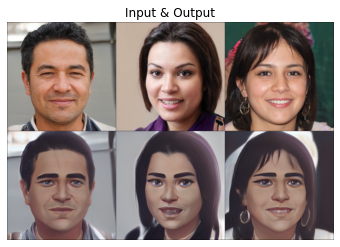

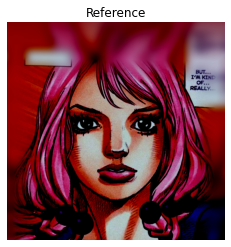

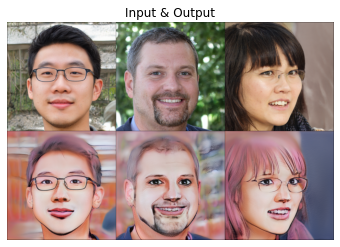

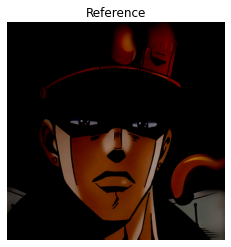

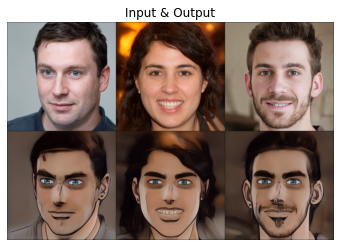

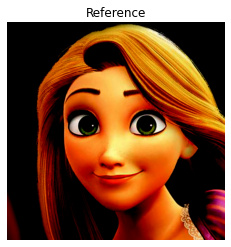

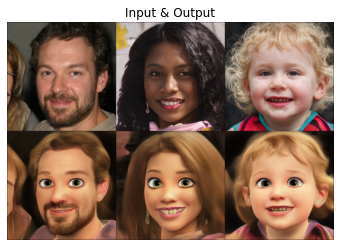

In [24]:
num_imgs = 3
styles = ['art', 'arcane_jinx', 'arcane_caitlyn', 'jojo_yasuho', 'jojo', 'disney']
for style in styles:
  print("Style: "+style)
  seed = randint(100, 3000)
  compute_output_on_random_images(style, num_imgs, seed)

##New trained styles

###Goku

Downloading...
From: https://drive.google.com/uc?id=1aNWZBaR0xFlJx54bFDmhG6mjN7xfwl_B
To: /content/JoJoGAN/style_images/goku.jpg
100% 67.4k/67.4k [00:00<00:00, 66.4MB/s]


Downloading...
From: https://drive.google.com/uc?id=11BDmNKS1zxSZxkgsEvQoKgFd8J264jKp
To: /content/JoJoGAN/models/dlibshape_predictor_68_face_landmarks.dat
100%|██████████| 99.7M/99.7M [00:01<00:00, 62.2MB/s]


Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt


/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:64: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  "The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. "


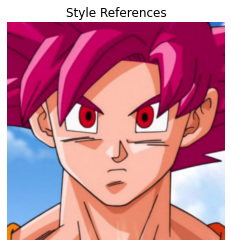

In [11]:
names = ['goku.jpg']
targets, latents = load_new_reference(names)

Train with:

* 300 epochs
* alpha = 1

In [13]:
generator, train_loss = train_on_new_reference(300, targets, latents)

Epoch: 1/300
Loss: 0.49363693594932556

Epoch: 2/300
Loss: 0.4977145195007324

Epoch: 3/300
Loss: 0.46236705780029297

Epoch: 4/300
Loss: 0.46958035230636597

Epoch: 5/300
Loss: 0.4644521474838257

Epoch: 6/300
Loss: 0.45887675881385803

Epoch: 7/300
Loss: 0.48201611638069153

Epoch: 8/300
Loss: 0.4522101879119873

Epoch: 9/300
Loss: 0.45812422037124634

Epoch: 10/300
Loss: 0.448417067527771

Epoch: 11/300
Loss: 0.43733957409858704

Epoch: 12/300
Loss: 0.4426507353782654

Epoch: 13/300
Loss: 0.4408021569252014

Epoch: 14/300
Loss: 0.435721218585968

Epoch: 15/300
Loss: 0.4287750720977783

Epoch: 16/300
Loss: 0.41840314865112305

Epoch: 17/300
Loss: 0.41192153096199036

Epoch: 18/300
Loss: 0.42061513662338257

Epoch: 19/300
Loss: 0.42679110169410706

Epoch: 20/300
Loss: 0.4173392057418823

Epoch: 21/300
Loss: 0.41513487696647644

Epoch: 22/300
Loss: 0.4128836989402771

Epoch: 23/300
Loss: 0.4083150625228882

Epoch: 24/300
Loss: 0.41378724575042725

Epoch: 25/300
Loss: 0.4101580381393432

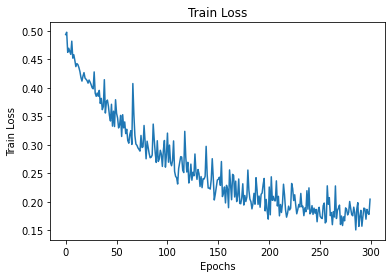

In [19]:
plot_train_trend(train_loss)

Downloading...
From: https://drive.google.com/uc?id=1LWG71-s7F1rw-_pHGEZQ9c570nLei6gY
To: /content/JoJoGAN/test_input/robert.jpg
100% 148k/148k [00:00<00:00, 31.9MB/s]
Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt


/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:64: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  "The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. "


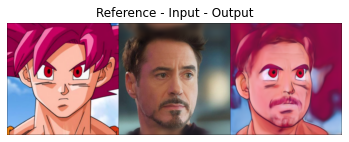

In [14]:
compute_output_on_given_image("goku", "robert.jpg", generator)

Downloading...
From: https://drive.google.com/uc?id=1vlFr8ZNFh1FYrBNCXQtKxER8oyZ5JqXW
To: /content/JoJoGAN/test_input/me.jpg
100% 78.5k/78.5k [00:00<00:00, 63.4MB/s]
Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt


/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:64: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  "The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. "


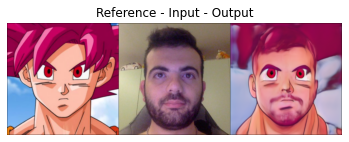

In [15]:
compute_output_on_given_image("goku", "me.jpg", generator)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:64: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  "The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. "


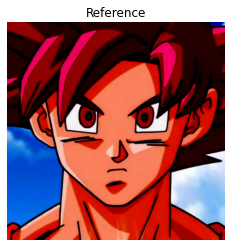

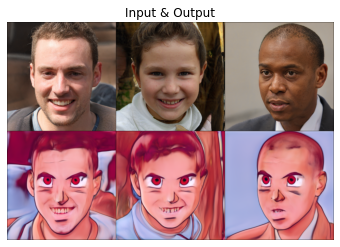

In [16]:
seed = randint(100, 3000)
num_imgs = 3
compute_output_on_random_images("goku", num_imgs, seed, generator)

###Avatar

Downloading...
From: https://drive.google.com/uc?id=1yimfi6H0_6gm5INbgDv1BxvnUju-00aB
To: /content/JoJoGAN/style_images/avatar.jpg
100% 81.6k/81.6k [00:00<00:00, 43.9MB/s]


Downloading...
From: https://drive.google.com/uc?id=11BDmNKS1zxSZxkgsEvQoKgFd8J264jKp
To: /content/JoJoGAN/models/dlibshape_predictor_68_face_landmarks.dat
100%|██████████| 99.7M/99.7M [00:01<00:00, 64.9MB/s]


Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt


/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:64: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  "The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. "


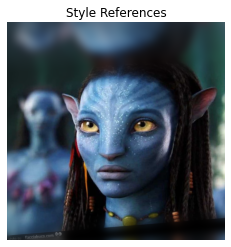

In [10]:
names = ['avatar.jpg']
targets, latents = load_new_reference(names)

Train with:

* 200 epochs
* alpha = 0

In [12]:
generator, train_loss = train_on_new_reference(200, targets, latents, alpha=0)

Epoch: 1/200
Loss: 0.22756768763065338

Epoch: 2/200
Loss: 0.23043307662010193

Epoch: 3/200
Loss: 0.22702768445014954

Epoch: 4/200
Loss: 0.20600047707557678

Epoch: 5/200
Loss: 0.19869230687618256

Epoch: 6/200
Loss: 0.2106897085905075

Epoch: 7/200
Loss: 0.21871674060821533

Epoch: 8/200
Loss: 0.1934213936328888

Epoch: 9/200
Loss: 0.19975565373897552

Epoch: 10/200
Loss: 0.20512190461158752

Epoch: 11/200
Loss: 0.19292329251766205

Epoch: 12/200
Loss: 0.18837188184261322

Epoch: 13/200
Loss: 0.21038347482681274

Epoch: 14/200
Loss: 0.18052902817726135

Epoch: 15/200
Loss: 0.17161279916763306

Epoch: 16/200
Loss: 0.18206197023391724

Epoch: 17/200
Loss: 0.2051868885755539

Epoch: 18/200
Loss: 0.18460479378700256

Epoch: 19/200
Loss: 0.17512452602386475

Epoch: 20/200
Loss: 0.17769259214401245

Epoch: 21/200
Loss: 0.17927396297454834

Epoch: 22/200
Loss: 0.17001600563526154

Epoch: 23/200
Loss: 0.1848543882369995

Epoch: 24/200
Loss: 0.17599360644817352

Epoch: 25/200
Loss: 0.1767436

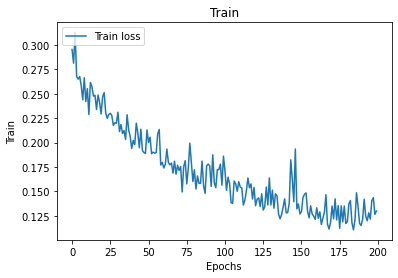

In [38]:
plot_train_trend(train_loss)

Downloading...
From: https://drive.google.com/uc?id=1LWG71-s7F1rw-_pHGEZQ9c570nLei6gY
To: /content/JoJoGAN/test_input/robert.jpg
100% 148k/148k [00:00<00:00, 53.6MB/s]
Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt


/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:64: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  "The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. "


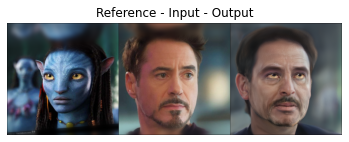

In [13]:
compute_output_on_given_image("avatar", "robert.jpg", generator)

Train with:

* 300 epochs (model trained first with 200 epochs, than re-loaded and trained with other 100 epochs)
* alpha = 1

In [28]:
generator, train_loss = train_on_new_reference(100, targets, latents, "/content/genAvatar2.pt")

Epoch: 1/100
Loss: 0.1282227337360382

Epoch: 2/100
Loss: 0.10881088674068451

Epoch: 3/100
Loss: 0.10127943754196167

Epoch: 4/100
Loss: 0.12889018654823303

Epoch: 5/100
Loss: 0.11826864629983902

Epoch: 6/100
Loss: 0.1181279718875885

Epoch: 7/100
Loss: 0.1303529292345047

Epoch: 8/100
Loss: 0.11927507072687149

Epoch: 9/100
Loss: 0.1131039559841156

Epoch: 10/100
Loss: 0.15263964235782623

Epoch: 11/100
Loss: 0.1472001075744629

Epoch: 12/100
Loss: 0.11960291862487793

Epoch: 13/100
Loss: 0.13005149364471436

Epoch: 14/100
Loss: 0.11410119384527206

Epoch: 15/100
Loss: 0.12454241514205933

Epoch: 16/100
Loss: 0.1263802945613861

Epoch: 17/100
Loss: 0.09692014008760452

Epoch: 18/100
Loss: 0.11158125102519989

Epoch: 19/100
Loss: 0.12897691130638123

Epoch: 20/100
Loss: 0.1269894540309906

Epoch: 21/100
Loss: 0.13324925303459167

Epoch: 22/100
Loss: 0.1175135150551796

Epoch: 23/100
Loss: 0.10475745052099228

Epoch: 24/100
Loss: 0.1117769256234169

Epoch: 25/100
Loss: 0.106473952531

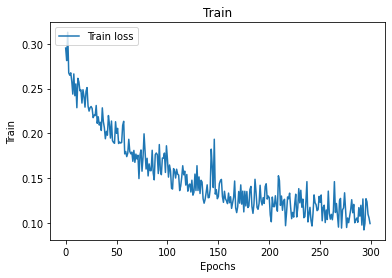

In [33]:
plot_train_trend(train_loss, "Train")

Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt


/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:64: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  "The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. "


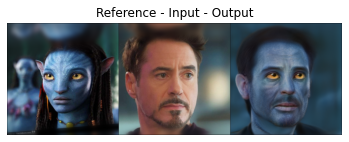

In [29]:
compute_output_on_given_image("avatar", "robert.jpg", generator)

Downloading...
From: https://drive.google.com/uc?id=1vlFr8ZNFh1FYrBNCXQtKxER8oyZ5JqXW
To: /content/JoJoGAN/test_input/me.jpg
100% 78.5k/78.5k [00:00<00:00, 38.0MB/s]
Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt


/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:64: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  "The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. "


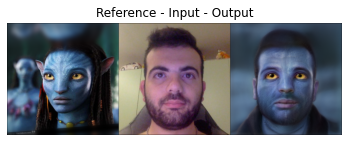

In [39]:
compute_output_on_given_image("avatar", "me.jpg", generator)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:64: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  "The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. "


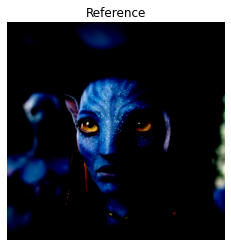

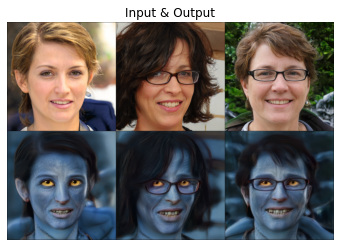

In [40]:
seed = randint(100, 3000)
num_imgs = 3
compute_output_on_random_images("avatar", num_imgs, seed, generator)

###Multi-sketch

Train with:

* 300 epochs
* alpha = 1

Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt


Downloading...
From: https://drive.google.com/uc?id=11BDmNKS1zxSZxkgsEvQoKgFd8J264jKp
To: /content/JoJoGAN/models/dlibshape_predictor_68_face_landmarks.dat
100%|██████████| 99.7M/99.7M [00:02<00:00, 40.2MB/s]


Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt


/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:64: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  "The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. "


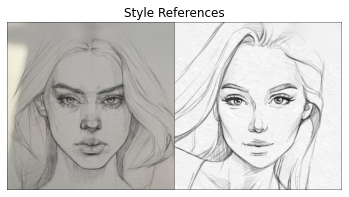

In [11]:
names = ['sketch.jpeg', 'sketch2.jpeg']
targets, latents = load_new_reference(names)

In [12]:
generator, train_loss = train_on_new_reference(100, targets, latents)

Epoch: 1/100
Loss: 0.3689495027065277

Epoch: 2/100
Loss: 0.31583738327026367

Epoch: 3/100
Loss: 0.29828310012817383

Epoch: 4/100
Loss: 0.31097736954689026

Epoch: 5/100
Loss: 0.30683237314224243

Epoch: 6/100
Loss: 0.28019389510154724

Epoch: 7/100
Loss: 0.30439019203186035

Epoch: 8/100
Loss: 0.27132222056388855

Epoch: 9/100
Loss: 0.2774012088775635

Epoch: 10/100
Loss: 0.28175675868988037

Epoch: 11/100
Loss: 0.2699168026447296

Epoch: 12/100
Loss: 0.27177250385284424

Epoch: 13/100
Loss: 0.2730537950992584

Epoch: 14/100
Loss: 0.28045934438705444

Epoch: 15/100
Loss: 0.2647789716720581

Epoch: 16/100
Loss: 0.24555565416812897

Epoch: 17/100
Loss: 0.23538914322853088

Epoch: 18/100
Loss: 0.2481955736875534

Epoch: 19/100
Loss: 0.27172139286994934

Epoch: 20/100
Loss: 0.23373453319072723

Epoch: 21/100
Loss: 0.2533254623413086

Epoch: 22/100
Loss: 0.2380468100309372

Epoch: 23/100
Loss: 0.24042944610118866

Epoch: 24/100
Loss: 0.235198512673378

Epoch: 25/100
Loss: 0.2230867296457

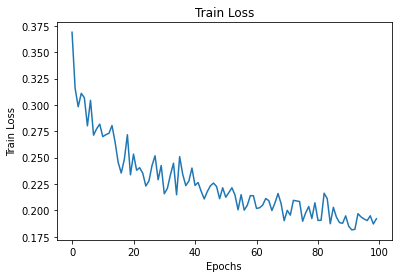

In [13]:
plot_train_trend(train_loss)

Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt


/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:64: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  "The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. "


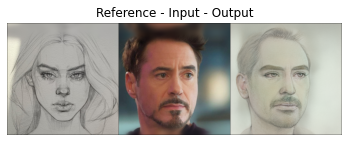

In [15]:
compute_output_on_given_image("sketch", "robert.jpg", generator)

Downloading...
From: https://drive.google.com/uc?id=1vlFr8ZNFh1FYrBNCXQtKxER8oyZ5JqXW
To: /content/JoJoGAN/test_input/me.jpg
100% 78.5k/78.5k [00:00<00:00, 67.3MB/s]
Loading e4e over the pSp framework from checkpoint: models/e4e_ffhq_encode.pt


/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:64: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  "The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. "


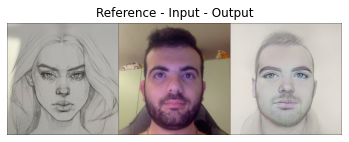

In [16]:
compute_output_on_given_image("sketch", "me.jpg", generator)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/usr/local/lib/python3.7/dist-packages/torchvision/utils.py:64: UserWarning: The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. Please use 'value_range' instead.
  "The parameter 'range' is deprecated since 0.12 and will be removed in 0.14. "


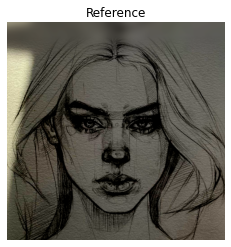

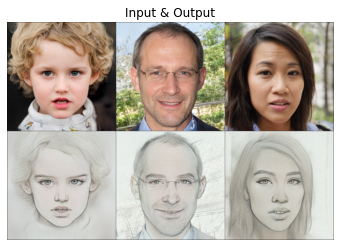

In [17]:
seed = randint(100, 3000)
num_imgs = 3
compute_output_on_random_images("sketch", num_imgs, seed, generator)

#Original Generator & Discriminator

The following two classes are reported only to show the structure used from the neural networks of Generator and Discriminator, so they are not to compile.

##Generator

In [ ]:
class Generator(nn.Module):
    def __init__(
        self,
        size,
        style_dim,
        n_mlp,
        channel_multiplier=2,
        blur_kernel=[1, 3, 3, 1],
        lr_mlp=0.01,
    ):
        super().__init__()

        self.size = size

        self.style_dim = style_dim

        layers = [PixelNorm()]

        for i in range(n_mlp):
            layers.append(
                EqualLinear(
                    style_dim, style_dim, lr_mul=lr_mlp, activation="fused_lrelu"
                )
            )

        self.style = nn.Sequential(*layers)

        self.channels = {
            4: 512,
            8: 512,
            16: 512,
            32: 512,
            64: 256 * channel_multiplier,
            128: 128 * channel_multiplier,
            256: 64 * channel_multiplier,
            512: 32 * channel_multiplier,
            1024: 16 * channel_multiplier,
        }

        self.input = ConstantInput(self.channels[4])
        self.conv1 = StyledConv(
            self.channels[4], self.channels[4], 3, style_dim, blur_kernel=blur_kernel
        )
        self.to_rgb1 = ToRGB(self.channels[4], style_dim, upsample=False)

        self.log_size = int(math.log(size, 2))
        self.num_layers = (self.log_size - 2) * 2 + 1

        self.convs = nn.ModuleList()
        self.upsamples = nn.ModuleList()
        self.to_rgbs = nn.ModuleList()
        self.noises = nn.Module()

        in_channel = self.channels[4]

        for layer_idx in range(self.num_layers):
            res = (layer_idx + 5) // 2
            shape = [1, 1, 2 ** res, 2 ** res]
            self.noises.register_buffer(f"noise_{layer_idx}", torch.randn(*shape))

        for i in range(3, self.log_size + 1):
            out_channel = self.channels[2 ** i]

            self.convs.append(
                StyledConv(
                    in_channel,
                    out_channel,
                    3,
                    style_dim,
                    upsample=True,
                    blur_kernel=blur_kernel,
                )
            )

            self.convs.append(
                StyledConv(
                    out_channel, out_channel, 3, style_dim, blur_kernel=blur_kernel
                )
            )

            self.to_rgbs.append(ToRGB(out_channel, style_dim))

            in_channel = out_channel

        self.n_latent = self.log_size * 2 - 2

    def make_noise(self):
        device = self.input.input.device

        noises = [torch.randn(1, 1, 2 ** 2, 2 ** 2, device=device)]

        for i in range(3, self.log_size + 1):
            for _ in range(2):
                noises.append(torch.randn(1, 1, 2 ** i, 2 ** i, device=device))

        return noises

    @torch.no_grad()
    def mean_latent(self, n_latent):
        latent_in = torch.randn(
            n_latent, self.style_dim, device=self.input.input.device
        )
        latent = self.style(latent_in).mean(0, keepdim=True)

        return latent

    @torch.no_grad()
    def get_latent(self, input):
        return self.style(input)

    def forward(
        self,
        styles,
        return_latents=False,
        inject_index=None,
        truncation=1,
        truncation_latent=None,
        input_is_latent=False,
        noise=None,
        randomize_noise=True,
    ):

        if noise is None:
            if randomize_noise:
                noise = [None] * self.num_layers
            else:
                noise = [
                    getattr(self.noises, f"noise_{i}") for i in range(self.num_layers)
                ]

        if not input_is_latent:
            styles = [self.style(s) for s in styles]

            if truncation < 1:
                style_t = []

                for style in styles:
                    style_t.append(
                        truncation_latent + truncation * (style - truncation_latent)
                    )

                styles = style_t
            latent = styles[0].unsqueeze(1).repeat(1, self.n_latent, 1)
        else:
            latent = styles

        out = self.input(latent)
        out = self.conv1(out, latent[:, 0], noise=noise[0])

        skip = self.to_rgb1(out, latent[:, 1])

        i = 1
        for conv1, conv2, noise1, noise2, to_rgb in zip(
            self.convs[::2], self.convs[1::2], noise[1::2], noise[2::2], self.to_rgbs
        ):
            out = conv1(out, latent[:, i], noise=noise1)
            out = conv2(out, latent[:, i + 1], noise=noise2)
            skip = to_rgb(out, latent[:, i + 2], skip)

            i += 2

        image = skip

        return image

##Discriminator

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, size, channel_multiplier=2, blur_kernel=[1, 3, 3, 1]):
        super().__init__()

        channels = {
            4: 512,
            8: 512,
            16: 512,
            32: 512,
            64: 256 * channel_multiplier,
            128: 128 * channel_multiplier,
            256: 64 * channel_multiplier,
            512: 32 * channel_multiplier,
            1024: 16 * channel_multiplier,
        }

        convs = [ConvLayer(3, channels[size], 1)]

        log_size = int(math.log(size, 2))

        in_channel = channels[size]

        for i in range(log_size, 2, -1):
            out_channel = channels[2 ** (i - 1)]

            convs.append(ResBlock(in_channel, out_channel, blur_kernel))

            in_channel = out_channel

        self.convs = nn.ModuleList(convs)
        self.layers = (1,3,4,5)

    def forward(self, input):
        output = []
        out = input
        for i, block in enumerate(self.convs):
            out = block(out)
            if i in self.layers:
                output.append(out)
            if i == max(self.layers):
                break
        return output